In [ ]:
!rm -f utils.py
!wget -nv https://github.com/minesh1291/stackoverflow/raw/master/machine_learning/utils.py
!pip install -q kneebow

2022-01-17 14:55:27 URL:https://raw.githubusercontent.com/minesh1291/stackoverflow/master/machine_learning/utils.py [3037/3037] -> "utils.py" [1]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from statsmodels.tsa.seasonal import seasonal_decompose
import keras
from keras import layers
import utils

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
SEED = 1291

In [ ]:
satellite = pd.read_csv("satellite.mat.csv")
print(satellite.shape)
features = [c for c in satellite.columns if c.startswith("V")]
satellite.head()

(6435, 38)


,ID,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,Y
0,0,92,115,120,94,84,102,106,79,84,102,102,83,101,126,133,103,92,112,118,85,84,103,104,81,102,126,134,104,88,121,128,100,84,107,113,87,0
1,1,84,102,106,79,84,102,102,83,80,102,102,79,92,112,118,85,84,103,104,81,84,99,104,78,88,121,128,100,84,107,113,87,84,99,104,79,0
2,2,84,102,102,83,80,102,102,79,84,94,102,79,84,103,104,81,84,99,104,78,84,99,104,81,84,107,113,87,84,99,104,79,84,99,104,79,0
3,3,80,102,102,79,84,94,102,79,80,94,98,76,84,99,104,78,84,99,104,81,76,99,104,81,84,99,104,79,84,99,104,79,84,103,104,79,0
4,4,84,94,102,79,80,94,98,76,80,102,102,79,84,99,104,81,76,99,104,81,76,99,108,85,84,99,104,79,84,103,104,79,79,107,109,87,0


In [ ]:
satellite.drop('ID',
  axis='columns', inplace=True)

In [ ]:
satellite.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,Y
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,69.400000,83.594872,99.290598,82.592696,69.150272,83.243512,99.110645,82.497125,68.912354,82.893085,98.853302,82.388190,69.289666,83.476768,99.311267,82.644911,69.045688,83.171096,99.149806,82.603263,68.839316,82.860917,98.949650,82.468531,69.162393,83.373427,99.214763,82.660606,68.944056,83.145610,99.111888,82.618026,68.727584,82.858897,98.926030,82.505361,0.316395
std,13.605871,22.882234,16.645944,18.897674,13.561197,22.886495,16.664088,18.940923,13.470599,22.862255,16.636608,18.981112,13.602694,22.849895,16.667866,18.931989,13.537618,22.905065,16.717671,19.035543,13.459225,22.884380,16.729623,19.070751,13.580516,22.802737,16.612514,18.991281,13.492684,22.847199,16.704305,19.043661,13.401603,22.816959,16.695488,19.054274,0.465105
min,39.000000,27.000000,53.000000,33.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,0.000000
25%,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,68.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,68.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,68.000000,0.000000
50%,68.000000,87.000000,101.000000,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,100.000000,81.000000,68.000000,85.000000,101.000000,81.000000,68.000000,85.000000,100.000000,81.000000,67.000000,84.000000,100.000000,81.000000,68.000000,85.000000,100.000000,81.000000,68.000000,85.000000,100.000000,81.000000,67.000000,84.000000,100.000000,81.000000,0.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,102.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,1.000000
max,104.000000,137.000000,140.000000,154.000000,104.000000,137.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,104.000000,137.000000,145.000000,154.000000,104.000000,130.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,104.000000,131.000000,140.000000,154.000000,104.000000,130.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,1.000000


In [ ]:
satellite.isnull().sum()

V0     0
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
Y      0
dtype: int64

**Preprocessing**

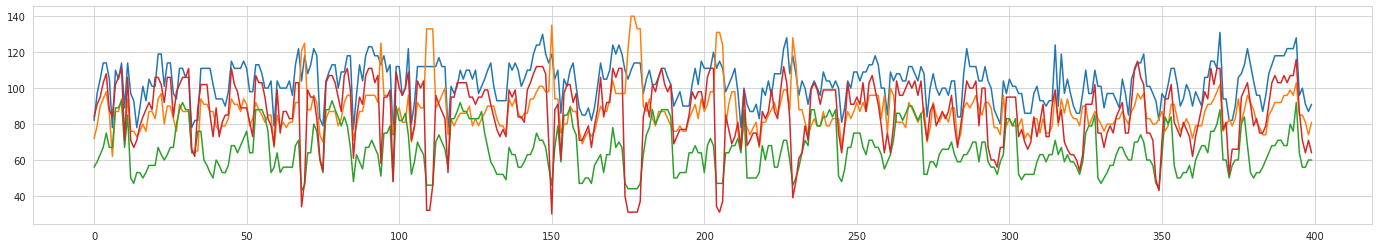

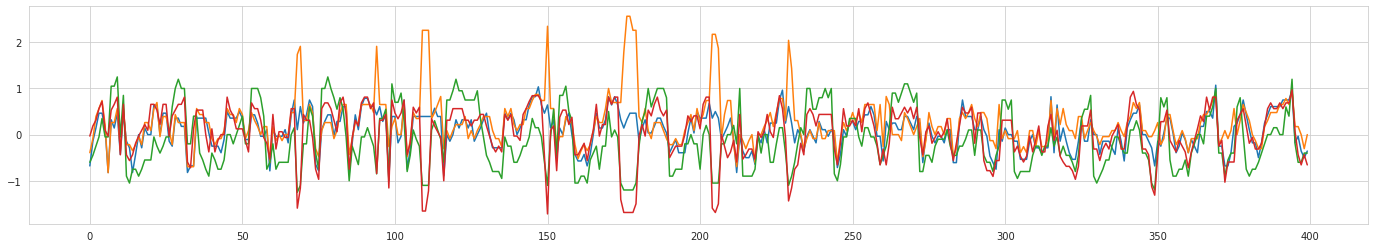

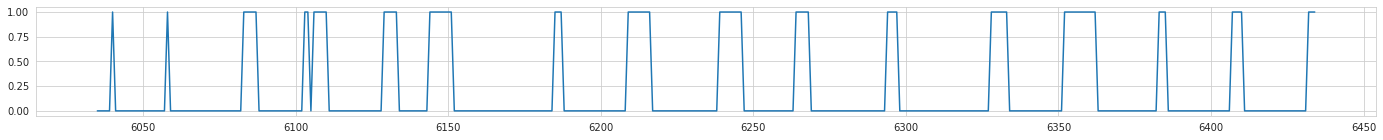

In [ ]:
scaler = RobustScaler()

train_org_scaled = scaler.fit_transform(train_org)

fig, ax = plt.subplots(figsize=(24,4))
pd.DataFrame(train_org.values[-400:,1:5]).plot(ax=ax, legend=False)
plt.show()

fig, ax = plt.subplots(figsize=(24,4))
pd.DataFrame(train_org_scaled[-400:,1:5]).plot(ax=ax, legend=False)
plt.show()

fig, ax = plt.subplots(figsize=(24,2))
satellite["Y"].iloc[-400:].plot(ax=ax)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(train_org_scaled))
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1.309643,-4.479017,-0.625169,-0.999227,0.827347,1.512994,0.286183,0.215897,-0.180444,-0.075130,0.260824,-0.282958,0.316343,0.042017,-0.069151,0.090107,-0.192411,-0.134018,0.113584,-0.026177,0.020645,-0.014833,-0.014082,-0.234847,0.051169,0.086407,0.048250,0.065534,0.171537,-0.088073,-0.014208,0.005980,0.040973,-0.147149,-0.107203
1,0.192888,-3.272389,-0.438224,-0.693622,0.398241,0.807270,0.145533,0.611144,-0.136862,-0.207024,0.162261,0.177802,0.099302,-0.005552,-0.201435,0.004058,0.096738,0.130495,0.218217,0.021728,-0.042543,-0.031867,0.174313,0.030572,-0.211952,0.035246,0.077299,-0.054472,-0.101662,0.196891,-0.008285,0.004571,-0.086358,-0.025018,0.067912
2,-0.319680,-2.681657,-0.527484,-0.194807,0.125304,0.210088,-0.012750,0.187102,-0.001479,-0.113041,0.051318,0.234624,0.160579,0.004084,-0.050514,0.042576,0.010565,0.154655,0.015168,-0.092370,0.053570,-0.022065,0.056617,0.039980,-0.013161,-0.025049,-0.149170,0.143489,-0.021168,-0.107074,0.060281,0.057563,-0.078219,0.110197,-0.028297
3,-0.541547,-2.421579,-0.496834,-0.148119,0.184124,0.022355,0.082030,-0.134200,0.144788,0.060903,-0.145898,0.125372,0.031639,-0.092746,-0.158027,-0.005358,0.046106,-0.192570,0.029070,-0.087496,-0.026632,0.034425,-0.025348,-0.021885,0.054734,0.065470,0.025473,-0.122259,-0.036397,-0.055702,0.060972,0.148809,0.144112,0.020503,0.038048
4,-0.278470,-2.309121,-0.235061,-0.323044,0.186225,-0.282829,0.064878,-0.132609,-0.222949,0.049462,-0.185844,-0.017391,0.299554,0.061404,-0.208755,-0.032505,0.005282,-0.283350,-0.137382,-0.063655,-0.034191,-0.005791,-0.173814,0.068358,0.001114,0.043929,0.133889,-0.014143,0.067050,-0.013336,-0.003986,-0.098270,0.005797,-0.017965,0.090297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,0.765504,0.286239,0.648973,-0.255301,0.167223,-0.156386,-0.019307,0.262706,-0.124209,-0.176798,-0.050155,0.100140,-0.273444,-0.018461,0.093333,0.066558,-0.027677,0.025193,-0.081421,-0.116868,-0.064666,0.008506,0.004826,-0.070879,0.003437,-0.173462,-0.113738,-0.014012,-0.101535,0.032104,-0.073737,0.066726,-0.070233,0.049983,0.056379
6431,0.331220,1.248151,0.439854,-0.240975,0.699843,0.195264,-0.129260,-0.124194,0.131252,0.032350,-0.170893,0.033729,-0.028670,0.060319,-0.012623,-0.066638,-0.027913,-0.002323,0.084022,0.079553,-0.019743,-0.150532,-0.090044,0.026718,0.019690,0.032009,-0.027046,0.040279,-0.103189,0.000134,-0.010100,-0.028211,-0.014423,0.004729,0.060910
6432,-0.497741,1.715838,0.517331,-0.317972,0.843332,0.227585,-0.467897,0.061113,0.080956,0.014107,0.099257,0.011984,-0.120246,0.056710,-0.003565,0.190286,0.103347,-0.032225,0.122367,-0.006492,-0.101640,0.048527,0.047527,-0.126884,-0.080942,0.118287,0.004774,0.025247,0.130269,-0.011245,0.094707,-0.014257,0.068964,-0.168108,-0.065733
6433,-0.431171,1.475170,0.488530,0.393579,0.538781,-0.923558,0.190830,0.743066,0.235887,0.147641,0.200122,0.176530,0.017991,0.085920,-0.213973,0.464105,-0.286644,-0.034289,-0.070636,-0.006542,-0.043281,0.089287,0.150928,-0.156362,-0.076887,0.018819,-0.156475,0.088045,-0.120168,-0.128733,-0.108808,-0.193986,-0.095955,0.037181,0.038698


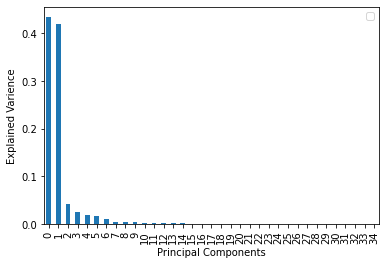

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
X =train_org_scaled

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
X =train_org_scaled
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()


**Outlier**

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
#import eif as iso
from sklearn import svm
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.dates as md
from scipy.stats import norm
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid") #possible choices: white, dark, whitegrid, darkgrid, ticks
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pd.set_option('float_format', '{:f}'.format)
pd.set_option('max_columns',250)
pd.set_option('max_rows',150)



**Isolation Forest**

In [ ]:
clf = IsolationForest(max_samples='auto', random_state = 1, contamination= 0.02)
preds = clf.fit_predict(X)
satellite['isoletionForest_outliers'] = preds
satellite['isoletionForest_outliers'] = satellite['isoletionForest_outliers'].astype(str)
satellite['isoletionForest_scores'] = clf.decision_function(X)
print(satellite['isoletionForest_outliers'].value_counts())
satellite[152:156]

1     6306
-1     129
Name: isoletionForest_outliers, dtype: int64


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,Y,isoletionForest_outliers,isoletionForest_scores,localOutlierFactor_outliers,localOutlierFactor_scores
152,88,107,109,92,88,107,109,87,88,107,109,87,90,104,112,89,86,104,108,89,90,104,108,92,92,108,110,86,92,108,110,86,92,103,105,86,0,1,0.164733,1,-1.005143
153,88,107,109,87,88,107,109,87,88,107,109,87,86,104,108,89,90,104,108,92,90,109,108,89,92,108,110,86,92,103,105,86,87,103,105,83,0,1,0.167824,1,-1.000822
154,88,107,109,87,88,107,109,87,88,103,109,87,90,104,108,92,90,109,108,89,86,104,112,85,92,103,105,86,87,103,105,83,92,103,110,83,0,1,0.168027,1,-1.054392
155,88,107,109,87,88,103,109,87,93,103,109,87,90,109,108,89,86,104,112,85,86,104,104,81,87,103,105,83,92,103,110,83,92,103,110,86,0,1,0.167299,1,-1.087625


In [ ]:
x1='V1'
x2='V2'
X = satellite[[x1,x2]]

plot the resluts

In [ ]:
fig = px.scatter(satellite
                 , x=x1, y=x2, color='isoletionForest_outliers')
fig.update_layout(title='Isolation Forest Outlier Detection', title_x=0.5, yaxis=dict(gridcolor = '#DFEAF4'), xaxis=dict(gridcolor = '#DFEAF4'), plot_bgcolor='white')
fig.show()


In [ ]:
fig = px.scatter(satellite, x=x1, y=x2, color="isoletionForest_scores")
fig.update_layout(title='Isolation Forest Outlier Detection (scores)', title_x=0.5,yaxis=dict(gridcolor = '#DFEAF4'), xaxis=dict(gridcolor = '#DFEAF4'), plot_bgcolor='white')
fig.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



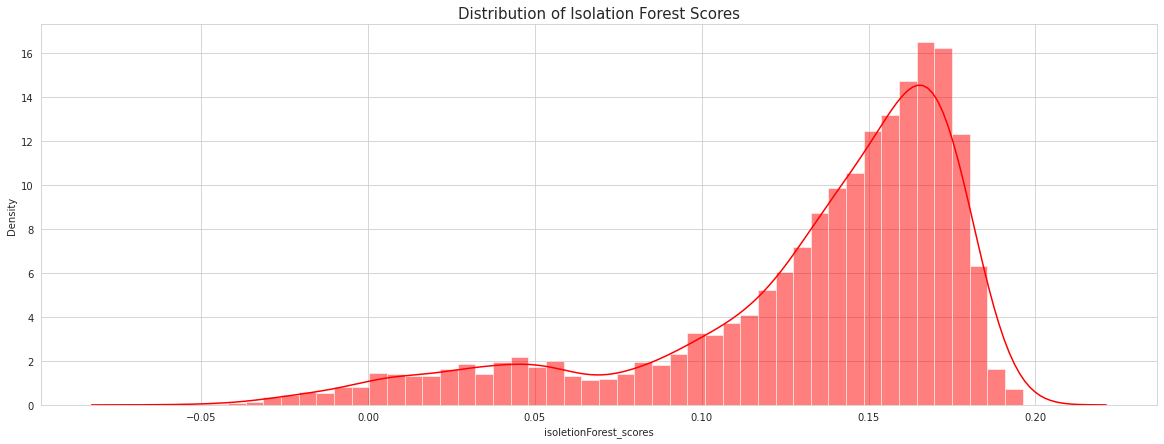

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Distribution of Isolation Forest Scores', fontsize = 15, loc='center')
sns.distplot(satellite['isoletionForest_scores'],color='red',label='if',hist_kws = {"alpha": 0.5});

Extended Isolation Forest

In [ ]:
!pip install git+https://github.com/dainean/eif.git

  Cloning https://github.com/dainean/eif.git to /tmp/pip-req-build-3no6vcr5
  Running command git clone -q https://github.com/dainean/eif.git /tmp/pip-req-build-3no6vcr5
  Created wheel for eif: filename=eif-2.0.2-cp37-cp37m-linux_x86_64.whl size=250870 sha256=0b599561716150f8ce4c3b63faed8eece94e472387966d9b744facaf0e778c30
  Stored in directory: /tmp/pip-ephem-wheel-cache-u_7cz7h5/wheels/b7/ab/19/dc7e35fa29d2692342cbe990ae5000d3270180ba1653e95ddf
Successfully built eif


**Local Outlier Factor**

In [ ]:
clf = LocalOutlierFactor(n_neighbors=11)
X =train_org_scaled
y_pred = clf.fit_predict(X)
satellite['localOutlierFactor_outliers'] = y_pred.astype(str)
print(satellite['localOutlierFactor_outliers'].value_counts())
satellite['localOutlierFactor_scores'] = clf.negative_outlier_factor_
satellite[152:156]


1     6338
-1      97
Name: localOutlierFactor_outliers, dtype: int64


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,Y,isoletionForest_outliers,isoletionForest_scores,localOutlierFactor_outliers,localOutlierFactor_scores,dbscan_outliers,ocsvm_outliers,ocsvm_scores,outliers_sum
152,88,107,109,92,88,107,109,87,88,107,109,87,90,104,112,89,86,104,108,89,90,104,108,92,92,108,110,86,92,108,110,86,92,103,105,86,0,1,0.164733,1,-1.005143,1,1,126.693607,1
153,88,107,109,87,88,107,109,87,88,107,109,87,86,104,108,89,90,104,108,92,90,109,108,89,92,108,110,86,92,103,105,86,87,103,105,83,0,1,0.167824,1,-1.000822,1,1,127.204282,1
154,88,107,109,87,88,107,109,87,88,103,109,87,90,104,108,92,90,109,108,89,86,104,112,85,92,103,105,86,87,103,105,83,92,103,110,83,0,1,0.168027,1,-1.054392,1,1,127.446219,1
155,88,107,109,87,88,103,109,87,93,103,109,87,90,109,108,89,86,104,112,85,86,104,104,81,87,103,105,83,92,103,110,83,92,103,110,86,0,1,0.167299,1,-1.087625,1,1,126.585407,1


plot

In [ ]:
fig = px.scatter(satellite, x=x1, y=x2, color='localOutlierFactor_outliers')
fig.update_layout(title='Local Outlier Factor Outlier Detection', title_x=0.5, yaxis=dict(gridcolor = '#DFEAF4'), xaxis=dict(gridcolor = '#DFEAF4'), plot_bgcolor='white')
fig.show()


In [ ]:
fig = px.scatter(satellite, x=x1, y=x2, color="localOutlierFactor_scores")
fig.update_layout(title='Local Outlier Factor Outlier Detection', title_x=0.5,yaxis=dict(gridcolor = '#DFEAF4'), xaxis=dict(gridcolor = '#DFEAF4'), plot_bgcolor='white')
fig.show()


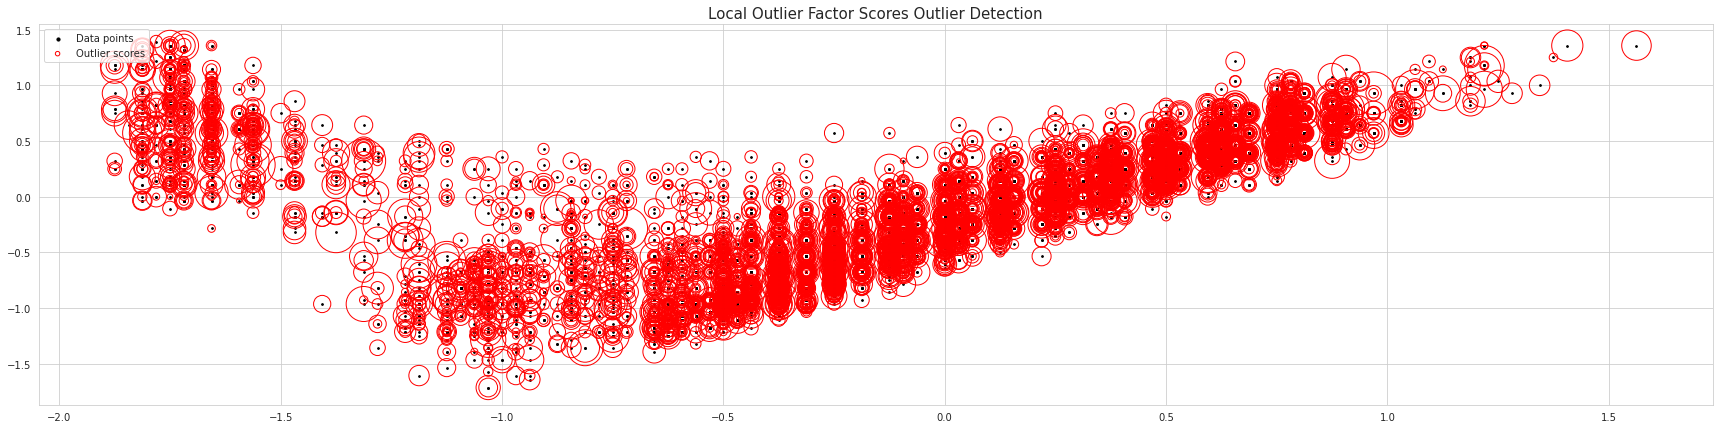

In [ ]:
fig, ax = plt.subplots(figsize=(30, 7))
ax.set_title('Local Outlier Factor Scores Outlier Detection', fontsize = 15, loc='center')

plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
radius = (satellite['localOutlierFactor_scores'].max() - satellite['localOutlierFactor_scores']) / (satellite['localOutlierFactor_scores'].max() - satellite['localOutlierFactor_scores'].min())
plt.scatter(X[:, 0], X[:, 1], s=2000 * radius, edgecolors='r', facecolors='none', label='Outlier scores')
plt.axis('tight')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



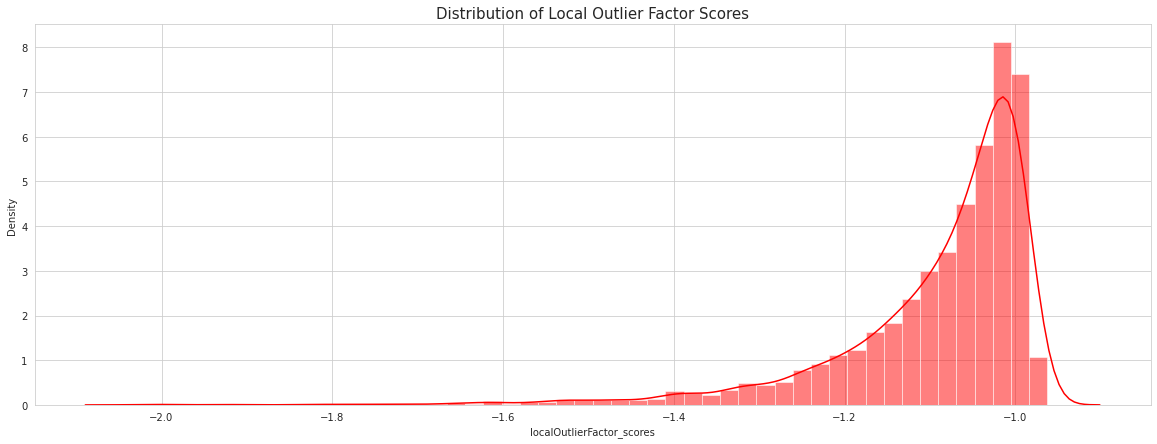

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Distribution of Local Outlier Factor Scores', fontsize = 15, loc='center')
sns.distplot(satellite['localOutlierFactor_scores'],color='red',label='eif',hist_kws = {"alpha": 0.5});


**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps = 20, metric='euclidean', min_samples = 5,n_jobs = -1)
X =train_org_scaled
clusters = outlier_detection.fit_predict(X)
satellite['dbscan_outliers'] = clusters
satellite['dbscan_outliers'] = satellite['dbscan_outliers'].apply(lambda x: str(1) if x>-1 else str(-1))
print(satellite['dbscan_outliers'].value_counts())


1    6435
Name: dbscan_outliers, dtype: int64


In [ ]:
fig = px.scatter(satellite, x=x1, y=x2, color="dbscan_outliers")
fig.update_layout(title='DBSCAN Outlier Detection', title_x=0.5,yaxis=dict(gridcolor = '#DFEAF4'), xaxis=dict(gridcolor = '#DFEAF4'), plot_bgcolor='white')
fig.show()


**One Class SVM**

In [ ]:
clf = svm.OneClassSVM(nu=0.07,kernel='rbf',gamma='auto')
outliers = clf.fit_predict(X)
satellite['ocsvm_outliers'] = outliers
satellite['ocsvm_outliers'] = satellite['ocsvm_outliers'].apply(lambda x: str(-1) if x==-1 else str(1))
satellite['ocsvm_scores'] = clf.score_samples(X)
print(satellite['ocsvm_outliers'].value_counts())


1     5984
-1     451
Name: ocsvm_outliers, dtype: int64


In [ ]:
fig = px.scatter(satellite, x=x1, y=x2, color="ocsvm_outliers")
fig.update_layout(title='One Class SVM Outlier Detection', title_x=0.5,yaxis=dict(gridcolor = '#DFEAF4'), xaxis=dict(gridcolor = '#DFEAF4'), plot_bgcolor='white')
fig.show()


**Ensemble**

In [ ]:
satellite['outliers_sum'] = satellite['isoletionForest_outliers'].astype(int)
+satellite['localOutlierFactor_outliers'].astype(int)
+satellite['dbscan_outliers'].astype(int)
+satellite['ocsvm_outliers'].astype(int)

In [ ]:
satellite['outliers_sum'].value_counts()


 4    5904
 2     387
 0     142
-2       2
Name: outliers_sum, dtype: int64

In [ ]:
fig = px.scatter(satellite, x=x1, y=x2, color="outliers_sum")
fig.update_layout(title='Ensemble Outlier Detection', title_x=0.5,yaxis=dict(gridcolor = '#DFEAF4'), xaxis=dict(gridcolor = '#DFEAF4'), plot_bgcolor='white')
fig.show()


In [ ]:
satellite['outliers_sum'] = satellite['outliers_sum'].apply(lambda x: str(1) if x==4 else str(-1))




In [ ]:
fig = px.scatter(satellite, x=x1, y=x2, color="outliers_sum")
fig.update_layout(title='Ensemble Outlier Detection', title_x=0.5,yaxis=dict(gridcolor = '#DFEAF4'), xaxis=dict(gridcolor = '#DFEAF4'), plot_bgcolor='white')
fig.show()